# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Aditya Bintang Aprilio
- **Email:** adityabintanga@gmail.com
- **ID Dicoding:** adityabintanga

## Menentukan Pertanyaan Bisnis

- Bagaimana persebaran users yang kita miliki berdasarkan musim dan cuaca?
- Kapan waktu rental paling banyak dan paling sedikit digunakan users? 

## Import Semua Packages/Library yang Digunakan

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

Memuat data dari day.csv

In [32]:
day_df = pd.read_csv("https://raw.githubusercontent.com/adityabintanga/dataanalysisproject.dicoding/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat data dari hour.csv

In [33]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/adityabintanga/dataanalysisproject.dicoding/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai data day_df.
Pertama-tama memeriksa tipe data data dari tiap kolom yang terdapat dalam cday_df. Proses ini dapat dilakukan menggunakan method info()

In [34]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Jika diperhatikan, tidak ada masalah dengan tipe data dari seluruh kolom tersebut.
Berikutnya, memastikan tidak adanya missing value pada data.

In [35]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value pada data. 
Berikutnya, memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada day_df. 

In [36]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada duplikasi dan keanehan pada data.

Menilai data hour_df.
Pertama-tama memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df. Proses ini dapat dilakukan menggunakan method info()

In [37]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Jika diperhatikan, tidak ada masalah dengan tipe data dari seluruh kolom tersebut.
Berikutnya, memastikan tidak adanya missing value pada data.

In [38]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value pada data. 
Berikutnya, memeriksa duplikasi dan ringkasan parameter statistik dari kolom numerik pada day_df. 

In [39]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada duplikasi dan keanehan pada data.

### Cleaning Data

Data yang dimiliki sudah bersih:
-tidak ada keanehan jumlah pada data
-tidak ada duplikasi data
-tidak ada missing value

## Exploratory Data Analysis (EDA)

### Explore ...

Eksplorasi data day_df.
Pertama-tama, melihat rangkuman parameter statistik dari data day_df menggunakan method describe().

In [40]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


Dari data di atas, diperoleh informasi bahwa dari total 731 hari terdapat jumlah casual users dengan kisaran 2 hingga 3410 users dengan rata-rata 848.17 users dengan standar deviasinya 686.62 users dan jumlah registered users dengan kisaran 20 hingga 6946 users dengan rata-rata 3656.17 users dengan standar deviasinya 1560.25 users.

Selanjutnya, melihat persebaran jumlah users berdasarkan musim (season) dan cuaca (weathersit)

In [41]:
day_df.groupby(by="season").agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual                         registered                          \
           sum   max  min         mean        sum   max  min         mean   
season                                                                      
1        60622  3155    9   334.928177     410726  5315  416  2269.204420   
2       203522  3410  120  1106.097826     715067  6456  674  3886.233696   
3       226091  3160  118  1202.611702     835038  6917  889  4441.691489   
4       129782  3031    2   729.112360     711831  6946   20  3999.050562   

            cnt                           
            sum   max   min         mean  
season                                    
1        471348  7836   431  2604.132597  
2        918589  8362   795  4992.331522  
3       1061129  8714  1115  5644.303191  
4        841613  8555    22  4728.162921

Dari data di atas, diperoleh informasi bahwa berdasarkan musim, users paling banyak melakukan rental sepeda pada musim gugur (fall), diikuti oleh musim panas (summer), musim salju (winter) dan yang paling sedikit adalah musim semi (springer). 

Selanjutnya, melihat persebaran jumlah users berdasarkan cuaca (weathersit)

In [42]:
day_df.groupby(by="weathersit").agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual                       registered                          \
               sum   max min        mean        sum   max  min         mean   
weathersit                                                                    
1           446346  3410  15  964.030238    1811606  6946  416  3912.755940   
2           169776  3155   9  687.352227     827082  6844  491  3348.510121   
3             3895  1264   2  185.476190      33974  4324   20  1617.809524   

                cnt                          
                sum   max  min         mean  
weathersit                                   
1           2257952  8714  431  4876.786177  
2            996858  8362  605  4035.862348  
3             37869  4639   22  1803.285714

Dari data di atas, diperoleh informasi bahwa berdasarkan musim, users paling banyak melakukan rental sepeda pada cuaca Clear, Few clouds, Partly cloudy, Partly cloudy; diikuti oleh cuaca Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; dan yang paling sedikit adalah cuaca Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds. Tidak ada yang rental sepedan pada saat cuaca Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.

Selanjutnya, melihat kapan musim dan cuaca tersebut terjadi

In [43]:
day_df.groupby(by="mnth").agg({
    "season": ["mean"],
    "weathersit": ["mean"],
    "temp": ["mean"]
})

,season,weathersit,temp
,mean,mean,mean
mnth,,,
1,1.000000,1.419355,0.236444
2,1.000000,1.368421,0.299226
3,1.354839,1.451613,0.390539
4,2.000000,1.416667,0.469999
5,2.000000,1.403226,0.594798
6,2.333333,1.233333,0.684097
7,3.000000,1.193548,0.755470
8,3.000000,1.306452,0.708582


Dari data di atas, diperoleh informasi bahwa musim semi (springer) terjadi pada bulan Januari hingga Maret, musim panas (summer) terjadi pada bulan April hingga Juni, musim gugur (fall) terjadi pada bulan Juli hingga September, dan musim salju (winter) terjadi pada bulan Oktober hingga Deseember.

Sekarang mari lihat persebaran users berdasarkan hari kerja dan hari libur/ weekend

In [44]:
day_df.groupby(by="workingday").agg({
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"]
})

,casual,registered,cnt
,mean,mean,mean
workingday,,,
0,1371.134199,2959.034632,4330.168831
1,606.570000,3978.250000,4584.820000


Dari data di atas, secara keseluruhan, users paling banyak melakukan rental sepeda pada hari libur/ weekend denga perbedaan tipis 200 users. Akan tetapi, jika dilihat dari jenis users, casual users lebih dominan melakukan rental di hari kerja sedangkan registered users lebih dominan melakukan rental pada hari libur/ weekend.

Sekarang, melakukan eksplorasi data hour_df.
Pertama-tama, melihat rangkuman parameter statistik dari data day_df menggunakan method describe().

In [45]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


Dari data di atas, diperoleh informasi bahwa dari total 731 hari terdapat jumlah casual users dengan kisaran 0 hingga 367 users dengan rata-rata 35.67 users dengan standar deviasinya 49.3 users dan jumlah registered users dengan kisaran 0 hingga 886 users dengan rata-rata 153.78 users dengan standar deviasinya 151.35 users.

Selanjutnya, melihat persebaran jumlah users berdasarkan musim (season) dan cuaca (weathersit)

In [46]:
hour_df.groupby(by="season").agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual                     registered                           cnt  \
           sum  max min       mean        sum  max min        mean      sum   
season                                                                        
1        60622  367   0  14.290901     410726  681   0   96.823668   471348   
2       203522  361   0  46.160581     715067  782   0  162.183488   918589   
3       226091  350   0  50.287144     835038  886   0  185.729093  1061129   
4       129782  362   0  30.666824     711831  876   0  168.202032   841613   

                             
        max min        mean  
season                       
1       801   1  111.114569  
2       957   1  208.344069  
3       977   1  236.016237  
4       967   1  198.868856

Dari data di atas, diperoleh informasi bahwa berdasarkan musim, users paling banyak melakukan rental sepeda pada musim gugur (fall), diikuti oleh musim panas (summer), musim salju (winter) dan yang paling sedikit adalah musim semi (springer). Sehingga dapat dilihat persebaran users berdasarkan musim sama pada data per hari dan data per jam.

Selanjutnya, melihat persebaran jumlah users di setiap jamnya

In [47]:
hour_df.groupby(by="hr").agg({
    "casual": ["sum", "max", "min", "mean"],
    "registered": ["sum", "max", "min", "mean"],
    "cnt": ["sum", "max", "min", "mean"]
})

casual                     registered                          cnt       \
      sum  max min       mean        sum  max min        mean     sum  max   
hr                                                                           
0    7375   68   0  10.158402      31755  234   0   43.739669   39130  283   
1    4709   49   0   6.504144      19455  139   0   26.871547   24164  168   
2    3412   44   0   4.772028      12940  104   0   18.097902   16352  132   
3    1893   26   0   2.715925       6281   61   0    9.011478    8174   79   
4     874   13   0   1.253945       3554   22   0    5.098996    4428   28   
5    1012   16   0   1.411437      13249   64   0   18.478382   14261   66   
6    3017   19   0   4.161379      52115  203   0   71.882759   55132  213   
7    8037   40   0  11.055021     146134  572   1  201.009629  154171  596   
8   15761   69   0  21.679505     245240  808   4  337.331499  261001  839   
9   22458  142   0  30.891334     136980  399   6  188.418157  159438  426   
10  33789  209   0  46.477304      92468  351   8  127.191197  126257  539   
11  43286  268   0  59.540578     108034  446   5  148.602476  151320  663   
12  49718  362   0  68.293956     134696  526   3  185.021978  184414  776   
13  52713  355   0  72.308642     132206  491   9  181.352538  184919  760   
14  55089  361   0  75.567901     120563  502  12  165.381344  175652  750   
15  54606  357   0  74.905350     128543  456   4  176.327846  183149  750   
16  53834  367   0  73.745205     173914  481   8  238.238356  227748  783   
17  54220  347   0  74.273973     282640  885  14  387.178082  336860  976   
18  44496  266   0  61.120879     265276  886  20  364.390110  309772  977   
19  35505  230   0  48.770604     191284  662  11  262.752747  226789  743   
20  26378  237   0  36.233516     138172  461   8  189.796703  164550  567   
21  20570  222   0  28.255495     104875  362   6  144.059066  125445  584   
22  16200  175   0  22.252747      79412  327   5  109.082418   95612  502   
23  11065   71   0  15.199176      52876  220   2   72.631868   63941  256   

                    
   min        mean  
hr                  
0    2   53.898072  
1    1   33.375691  
2    1   22.869930  
3    1   11.727403  
4    1    6.352941  
5    1   19.889819  
6    1   76.044138  
7    1  212.064649  
8    5  359.011004  
9   14  219.309491  
10   8  173.668501  
11  10  208.143054  
12   3  253.315934  
13  11  253.661180  
14  12  240.949246  
15   7  251.233196  
16  11  311.983562  
17  15  461.452055  
18  23  425.510989  
19  11  311.523352  
20  11  226.030220  
21   6  172.314560  
22   9  131.335165  
23   2   87.831044

Dari data di atas, diperoleh informasi bahwa users paling banyak melakukan rental pada jam kerja yaitu dimulai dari jam 9 pagi, kemudian bertambah naik hingga jam 5 sore. Setelah jam 5 sore, Users terus menurun hingga malam dan pagi jam 6.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana persebaran users yang kita miliki berdasarkan musim dan cuaca?

Bedasarkan Musim

In [48]:
day_df.groupby(by="season").agg({
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"]
})

,casual,registered,cnt
,mean,mean,mean
season,,,
1,334.928177,2269.204420,2604.132597
2,1106.097826,3886.233696,4992.331522
3,1202.611702,4441.691489,5644.303191
4,729.112360,3999.050562,4728.162921


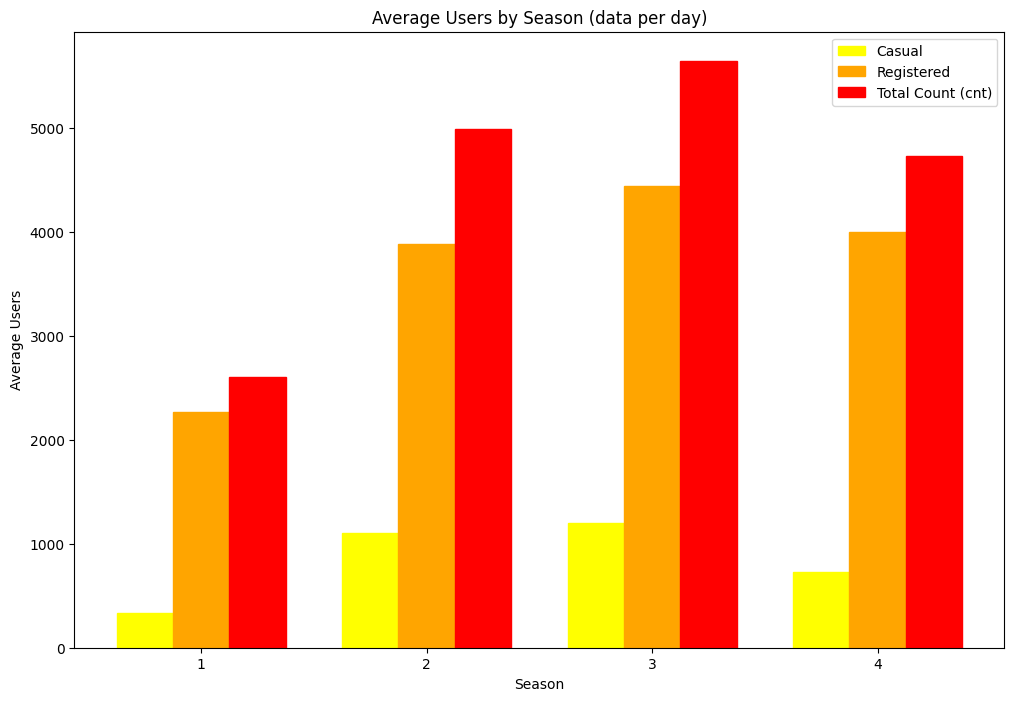

In [49]:
seasonal_averages = day_df.groupby(by="season").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
}).reset_index()

plt.figure(figsize=(12, 8))

bar_width = 0.25

r1 = np.arange(len(seasonal_averages['season']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, seasonal_averages['casual'], color='yellow', width=bar_width, edgecolor='yellow', label='Casual')
plt.bar(r2, seasonal_averages['registered'], color='orange', width=bar_width, edgecolor='orange', label='Registered')
plt.bar(r3, seasonal_averages['cnt'], color='red', width=bar_width, edgecolor='red', label='Total Count (cnt)')

plt.title('Average Users by Season (data per day)')
plt.xlabel('Season')
plt.xticks([r + bar_width for r in range(len(seasonal_averages['season']))], seasonal_averages['season'])
plt.ylabel('Average Users')

plt.legend()

plt.show()

Beradasarkan grafik Rata-rata users berdasarkan musim dengan menggunakan data day.csv, terlihat jelas bahwa baik casual users maupun registered users melakukan rental sepeda paling banyak di musim ketiga yaitu musim gugur (fall) dan paling sedikit di musim pertama yaitu musim semi (springer)

In [50]:
hour_df.groupby(by="season").agg({
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"]
})

,casual,registered,cnt
,mean,mean,mean
season,,,
1,14.290901,96.823668,111.114569
2,46.160581,162.183488,208.344069
3,50.287144,185.729093,236.016237
4,30.666824,168.202032,198.868856


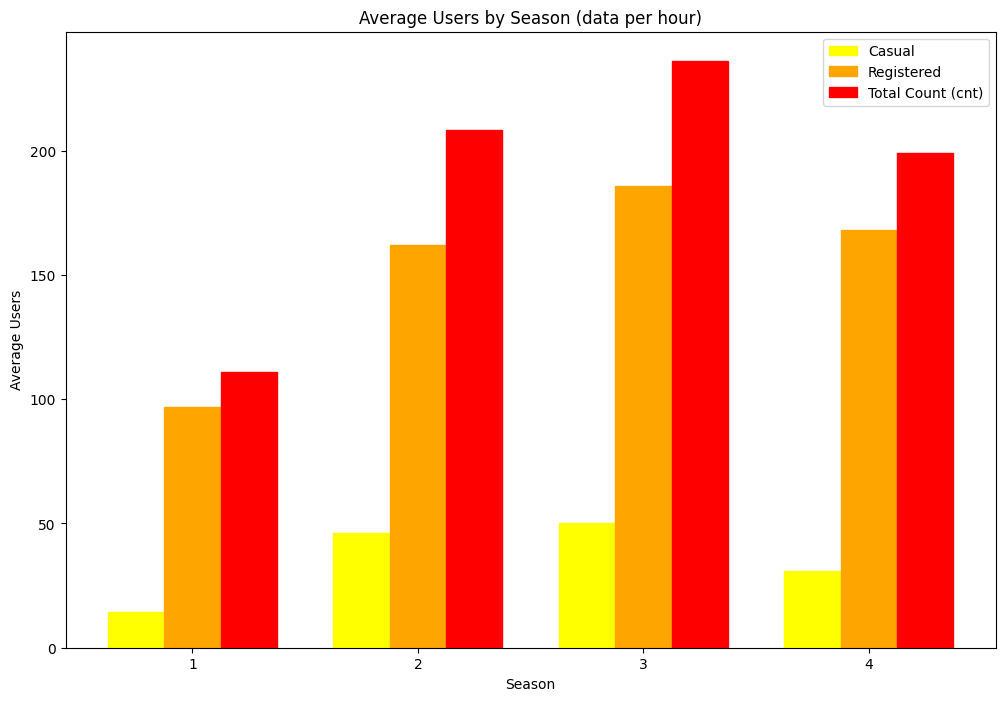

In [51]:
seasonal_averages = hour_df.groupby(by="season").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
}).reset_index()

plt.figure(figsize=(12, 8))

bar_width = 0.25

r1 = np.arange(len(seasonal_averages['season']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, seasonal_averages['casual'], color='yellow', width=bar_width, edgecolor='yellow', label='Casual')
plt.bar(r2, seasonal_averages['registered'], color='orange', width=bar_width, edgecolor='orange', label='Registered')
plt.bar(r3, seasonal_averages['cnt'], color='red', width=bar_width, edgecolor='red', label='Total Count (cnt)')

plt.title('Average Users by Season (data per hour)')
plt.xlabel('Season')
plt.xticks([r + bar_width for r in range(len(seasonal_averages['season']))], seasonal_averages['season'])
plt.ylabel('Average Users')

plt.legend()

plt.show()

Beradasarkan grafik Rata-rata users berdasarkan musim dengan menggunakan data hour.csv, terlihat jelas bahwa baik casual users maupun registered users melakukan rental sepeda paling banyak di musim ketiga yaitu musim gugur (fall) dan paling sedikit di musim pertama yaitu musim semi (springer)

Berdasarkan Cuaca

In [52]:
day_df.groupby(by="weathersit").agg({
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"]
})

,casual,registered,cnt
,mean,mean,mean
weathersit,,,
1,964.030238,3912.755940,4876.786177
2,687.352227,3348.510121,4035.862348
3,185.476190,1617.809524,1803.285714


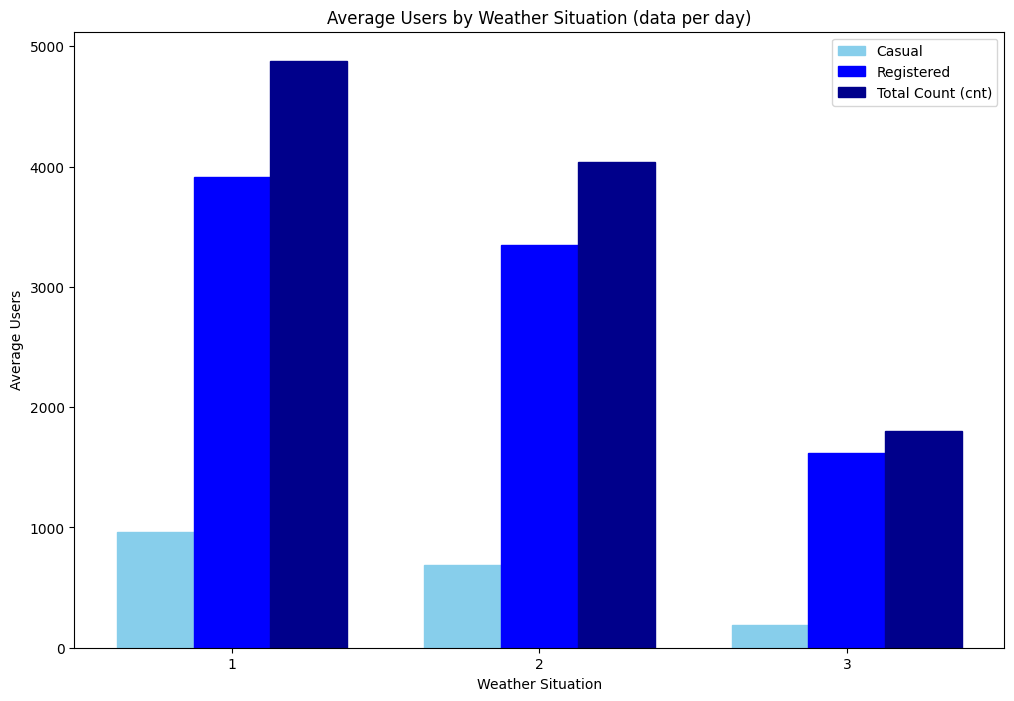

In [53]:
weather_averages = day_df.groupby(by="weathersit").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
}).reset_index()

plt.figure(figsize=(12, 8))

bar_width = 0.25

r1 = np.arange(len(weather_averages['weathersit']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, weather_averages['casual'], color='skyblue', width=bar_width, edgecolor='skyblue', label='Casual')
plt.bar(r2, weather_averages['registered'], color='blue', width=bar_width, edgecolor='blue', label='Registered')
plt.bar(r3, weather_averages['cnt'], color='darkblue', width=bar_width, edgecolor='darkblue', label='Total Count (cnt)')

plt.title('Average Users by Weather Situation (data per day)')
plt.xlabel('Weather Situation')
plt.xticks([r + bar_width for r in range(len(weather_averages['weathersit']))], weather_averages['weathersit'])
plt.ylabel('Average Users')

plt.legend()

plt.show()

Beradasarkan grafik Rata-rata users berdasarkan cuaca dengan menggunakan data day.csv, terlihat jelas bahwa baik casual users maupun registered users melakukan rental sepeda paling banyak pada saat cuaca pertama yaitu Clear, Few clouds, Partly cloudy, Partly cloudy dan paling sedikit pada saat cuaca ketiga yaitu Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

In [54]:
hour_df.groupby(by="weathersit").agg({
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"]
})

,casual,registered,cnt
,mean,mean,mean
weathersit,,,
1,40.545431,164.323841,204.869272
2,29.595290,145.570202,175.165493
3,16.055673,95.523608,111.579281
4,2.666667,71.666667,74.333333


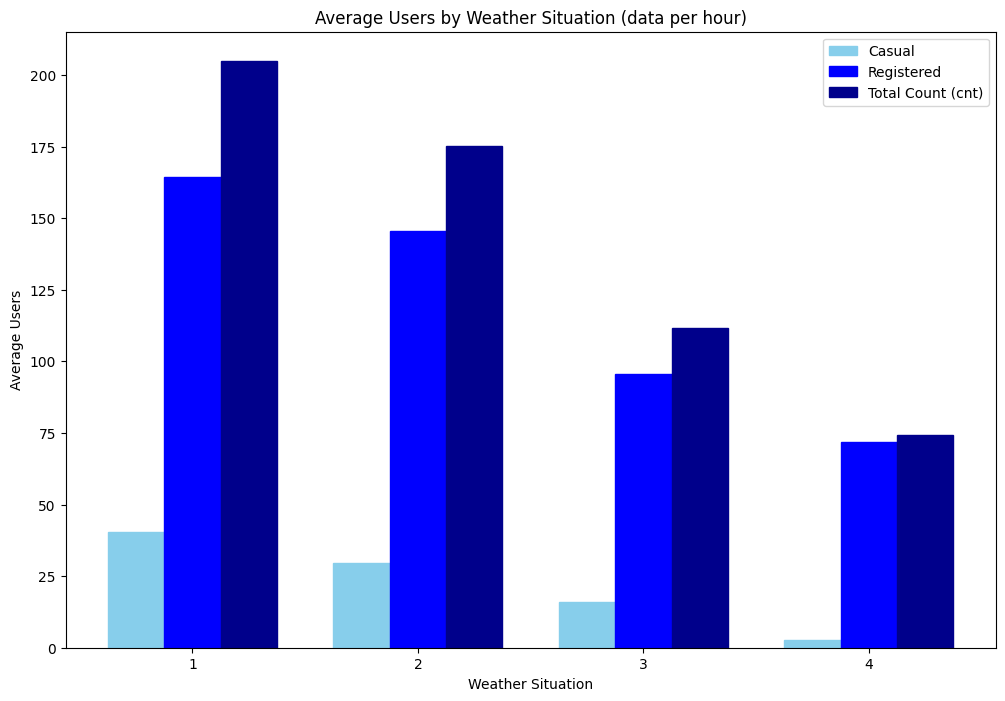

In [55]:
weather_averages = hour_df.groupby(by="weathersit").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
}).reset_index()

plt.figure(figsize=(12, 8))

bar_width = 0.25

r1 = np.arange(len(weather_averages['weathersit']))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.bar(r1, weather_averages['casual'], color='skyblue', width=bar_width, edgecolor='skyblue', label='Casual')
plt.bar(r2, weather_averages['registered'], color='blue', width=bar_width, edgecolor='blue', label='Registered')
plt.bar(r3, weather_averages['cnt'], color='darkblue', width=bar_width, edgecolor='darkblue', label='Total Count (cnt)')

plt.title('Average Users by Weather Situation (data per hour)')
plt.xlabel('Weather Situation')
plt.xticks([r + bar_width for r in range(len(weather_averages['weathersit']))], weather_averages['weathersit'])
plt.ylabel('Average Users')

plt.legend()

plt.show()

Beradasarkan grafik Rata-rata users berdasarkan cuaca dengan menggunakan data day.csv, terlihat jelas bahwa baik casual users maupun registered users melakukan rental sepeda paling banyak pada saat cuaca pertama yaitu Clear, Few clouds, Partly cloudy, Partly cloudy dan paling sedikit pada saat cuaca keempat yaitu Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

### Pertanyaan 2:

Kapan waktu rental paling banyak dan paling sedikit digunakan users? 

Berdasarkan Bulan

In [56]:
day_df.groupby(by="mnth").agg({
    "casual": ["mean"],
    "registered": ["mean"],
    "cnt": ["mean"]
})

,casual,registered,cnt
,mean,mean,mean
mnth,,,
1,194.225806,1982.112903,2176.338710
2,262.508772,2392.789474,2655.298246
3,716.838710,2975.419355,3692.258065
4,1013.366667,3471.533333,4484.900000
5,1214.274194,4135.500000,5349.774194
6,1231.766667,4540.600000,5772.366667
7,1260.596774,4303.080645,5563.677419
8,1161.919355,4502.500000,5664.419355


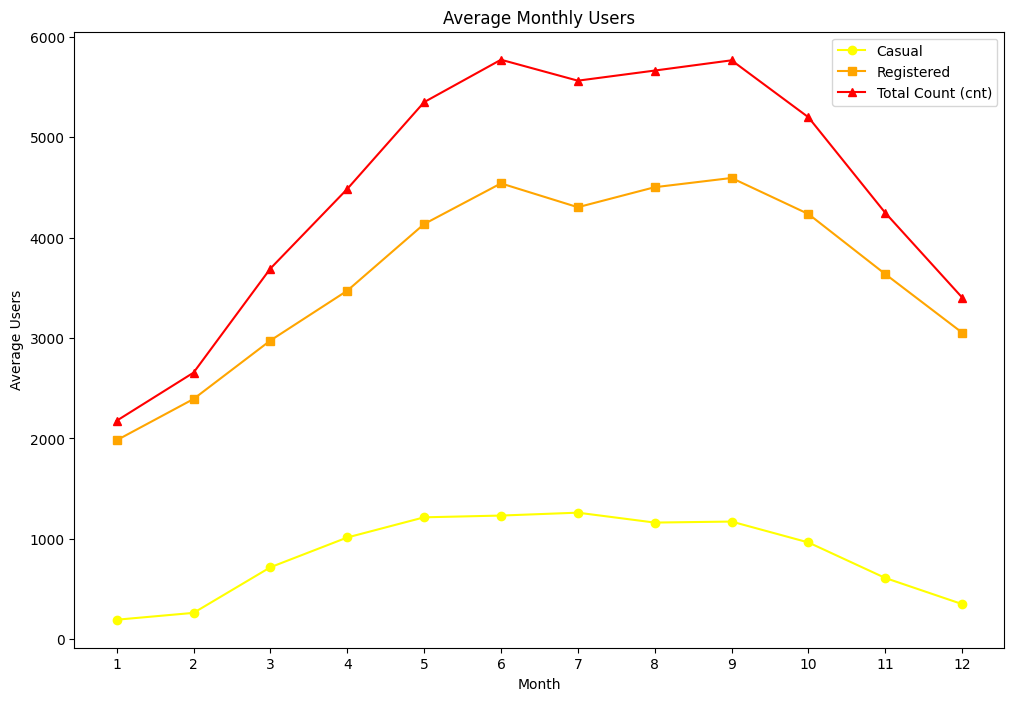

In [57]:
monthly_averages = day_df.groupby(by="mnth").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
}).reset_index()

plt.figure(figsize=(12, 8))

plt.plot(monthly_averages['mnth'], monthly_averages['casual'], color='yellow', marker='o', label='Casual')
plt.plot(monthly_averages['mnth'], monthly_averages['registered'], color='orange', marker='s', label='Registered')
plt.plot(monthly_averages['mnth'], monthly_averages['cnt'], color='red', marker='^', label='Total Count (cnt)')

plt.title('Average Monthly Users')
plt.xlabel('Month')
plt.xticks(monthly_averages['mnth'])  # Asumsikan 'mnth' adalah 1-12 atau sesuai dengan data Anda
plt.ylabel('Average Users')

plt.legend()

plt.show()

Beradasarkan grafik Rata-rata users tiap bulan dengan menggunakan data day.csv, terlihat bahwa baik casual users maupun registered users mangalami peningkatan yang cukup signifikan dari bulan ke-3 (maret) hingga bulan ke-6 (juni). Dan akan mengalami penurunan mulai dari bulan ke-9 (September) hingga bulan ke-12 (desember). Hal ini tentunya dipengaruhi oleh banyak faktor, diantaranya yaitu musim, cuaca, hari kerja dan hari libur/weekend

Berdasarkan jam

In [58]:
hour_df.groupby(by="hr").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
})

,casual,registered,cnt
hr,,,
0,10.158402,43.739669,53.898072
1,6.504144,26.871547,33.375691
2,4.772028,18.097902,22.869930
3,2.715925,9.011478,11.727403
4,1.253945,5.098996,6.352941
5,1.411437,18.478382,19.889819
6,4.161379,71.882759,76.044138
7,11.055021,201.009629,212.064649
8,21.679505,337.331499,359.011004


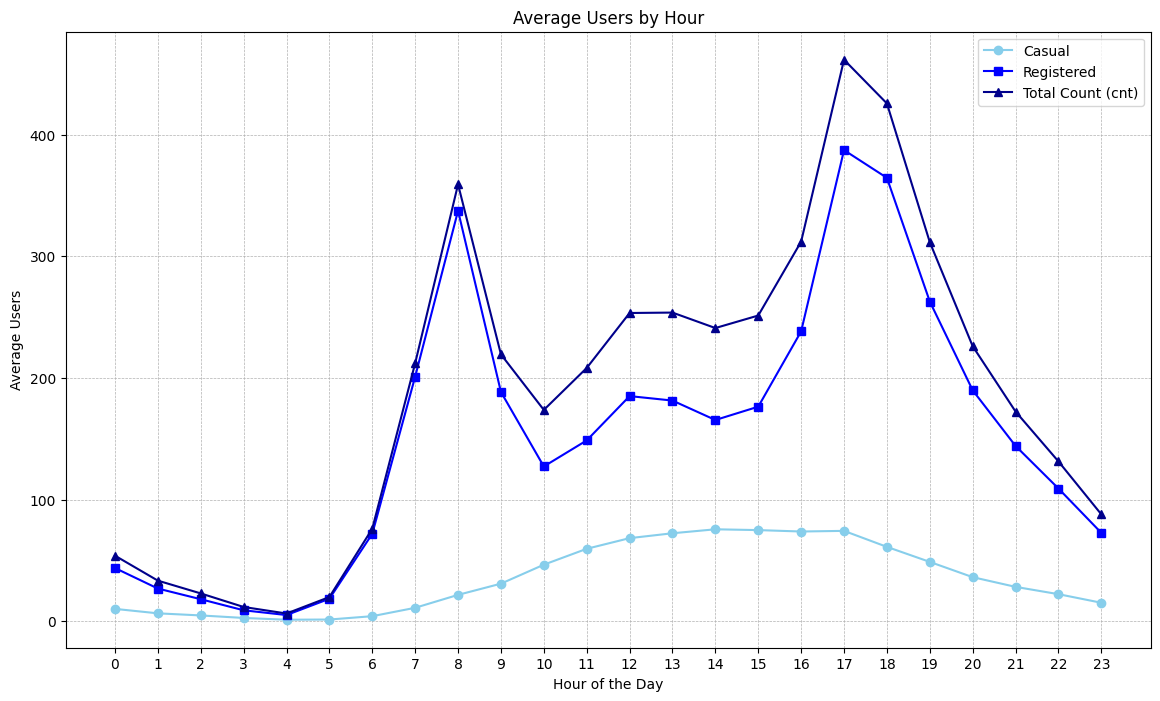

In [59]:
hourly_averages = hour_df.groupby(by="hr").agg({
    "casual": "mean",
    "registered": "mean",
    "cnt": "mean"
}).reset_index()

plt.figure(figsize=(14, 8))

plt.plot(hourly_averages['hr'], hourly_averages['casual'], color='skyblue', marker='o', label='Casual', linestyle='-')
plt.plot(hourly_averages['hr'], hourly_averages['registered'], color='blue', marker='s', label='Registered', linestyle='-')
plt.plot(hourly_averages['hr'], hourly_averages['cnt'], color='darkblue', marker='^', label='Total Count (cnt)', linestyle='-')

plt.title('Average Users by Hour')
plt.xlabel('Hour of the Day')
plt.xticks(hourly_averages['hr'])
plt.ylabel('Average Users')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.legend()

plt.show()

Beradasarkan grafik Rata-rata users tiap jam dengan menggunakan data hour.csv, terlihat bahwa untuk casual users mengalami peningkatan pada jam mulai beraktivitas atau jam berangkat kerja mulai dari pukul 08.00 hingga pukul 17.00. Setelah itu casual users mengalami penurunan hingga jam 23.00
Sementara itu, untuk registered users mengalami peningkatan yang siginifikan pada jam mulai beraktivitas atau jam berangkat kerja mulai pukul 06.00 hingga mencapai puncaknya pada pukul 08.00. Setelah itu, registered users mengalami penurunan dan mulai mengalami peningkatan kembali pada jam pulang kerja mulai pukul 16.00 hingga mencapai puncaknya pada pukul 17.00. Setelah itu registered users mengalami penurunan hingga jam 23.00

## Conclusion

- Persebaran users sangat dipengaruhi oleh musim dan cuaca. Users paling banyak melakukan rental sepeda pada musim gugur (fall) dengan cuaca Clear, Few clouds, Partly cloudy, Partly cloudy dan users paling sedikit di musim semi (springer) dengan cuaca Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- Jika berdasarkan bulan, users paling banyak melakukan rental sepeda pada bulan Juni dan September. Sedangkan jika berdasarkan jam, users paling banyak melakukan rental sepeda pada jam mulai beraktivitas atau jam berangkat kerja (pukul 08.00) dan jam pulang kerja (pukul 17.00)